# Библиотека PANDAS
### СИССЕ МОХАМЕД ЛАМИН
### НММбд-02-22

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В каждом разделе вам предлагается выполнить несколько заданий. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотекам pandas и matplotlib.

### Оценивание и штрафы

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написаем production-кода.

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*.

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных. С этой библиотекой мы сейчас и познакомимся.

Основной объект в pandas это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [ ]:
%pylab inline
# import almost all we need
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Данные находятся в приложенном файле `chipotle.tsv`

#### 1. Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [ ]:
orders_df = pd.read_csv('chipotle.tsv', sep='\t')

print(orders_df.tail(10))

      order_id  quantity            item_name  \
4612      1831         1        Carnitas Bowl   
4613      1831         1                Chips   
4614      1831         1        Bottled Water   
4615      1832         1   Chicken Soft Tacos   
4616      1832         1  Chips and Guacamole   
4617      1833         1        Steak Burrito   
4618      1833         1        Steak Burrito   
4619      1834         1   Chicken Salad Bowl   
4620      1834         1   Chicken Salad Bowl   
4621      1834         1   Chicken Salad Bowl   

                                     choice_description item_price  
4612  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...     $9.25   
4613                                                NaN     $2.15   
4614                                                NaN     $1.50   
4615   [Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]     $8.75   
4616                                                NaN     $4.45   
4617  [Fresh Tomato Salsa, [Rice, Black Beans,

Данные представляют собой информацию о заказах в ресторане, вероятно, были взяты из системы оформления заказов. В каждой строке содержится информация о конкретном товаре в заказе. Каждый заказ имеет уникальный идентификатор (order_id). Количество товара в заказе представлено в столбце quantity. Столбец item_name содержит наименование товара, а choice_description - описание выбора, например, ингредиенты блюда. Столбец item_price указывает цену товара.

В таблице 4621 строка. Столбцы:

#### 2.  Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [ ]:
total_orders = orders_df['order_id'].nunique()
unique_items = orders_df['item_name'].nunique()

In [ ]:
total_orders,unique_items

(1834, 50)

#### 3. Есть ли в данных пропуски? В каких колонках?

In [ ]:
print(orders_df.isnull().sum())

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64


Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [ ]:
orders_df.fillna(value={'item_name': '', 'choice_description': '', 'item_price': 0}, inplace=True)
print(orders_df.isnull().sum())

order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64


#### 4. Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [ ]:
orders_df['item_price_number'] = orders_df['item_price'].apply(lambda x: float(x[1:]))

Какая средняя/минимальная/максимальная цена у товара?

In [ ]:
mean_price = orders_df['item_price_number'].mean()
min_price = orders_df['item_price_number'].min()
max_price = orders_df['item_price_number'].max()

In [ ]:
mean_price,min_price,max_price

(7.464335785374297, 1.09, 44.25)

Удалите старую колонку с ценой.

In [ ]:
orders_df.drop(columns=['item_price'], inplace=True)

#### 5. Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [ ]:
orders_df = orders_df.rename(columns={'item_price_number':'item_price_new'})

In [ ]:
cheapest_items = orders_df.groupby('item_name')['item_price_new'].min().sort_values().head(5)
most_expensive_items = orders_df.groupby('item_name')['item_price_new'].max().sort_values(ascending=False).head(5)

print(cheapest_items)

print(most_expensive_items)

item_name
Bottled Water        1.09
Canned Soda          1.09
Canned Soft Drink    1.25
Side of Chips        1.69
Chips                1.99
Name: item_price_new, dtype: float64
item_name
Chips and Fresh Tomato Salsa    44.25
Carnitas Bowl                   35.25
Chicken Burrito                 35.00
Veggie Burrito                  33.75
Chicken Bowl                    32.94
Name: item_price_new, dtype: float64


#### 6. Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [ ]:
chicken_bowl_orders = orders_df[(orders_df['item_name'] == 'Chicken Bowl') & (orders_df['quantity'] > 1)]['order_id'].nunique()
print(chicken_bowl_orders)

33


#### 7. Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [ ]:
average_order_price = orders_df.groupby('order_id')['item_price_new'].sum().mean()
average_items_per_order = orders_df.groupby('order_id')['quantity'].sum().mean()

In [ ]:
average_order_price,average_items_per_order

(18.811428571428568, 2.711014176663032)

#### 8. Сколько заказов содержали ровно 1 товар?

In [ ]:
single_item_orders = orders_df.groupby('order_id')['quantity'].sum().eq(1).sum()
single_item_orders

56

#### 9. Какая самая популярная категория товара?

In [ ]:
most_popular_category = orders_df['item_name'].mode().values[0]
most_popular_category

'Chicken Bowl'

#### 10. Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой?

In [ ]:
burrito_types = orders_df[orders_df['item_name'].str.contains('Burrito')]['item_name'].unique()
most_common_burrito = orders_df[orders_df['item_name'].str.contains('Burrito')]['item_name'].mode().values[0]
most_expensive_burrito = orders_df[orders_df['item_name'].str.contains('Burrito')].nlargest(1, 'item_price_new')['item_name'].values[0]

In [ ]:
burrito_types,most_common_burrito,most_expensive_burrito

(array(['Steak Burrito', 'Chicken Burrito', 'Barbacoa Burrito',
        'Carnitas Burrito', 'Veggie Burrito', 'Burrito'], dtype=object),
 'Chicken Burrito',
 'Chicken Burrito')

#### 11. В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно среднюю стоимость заказа, добавить ее в исходные данные и сделать необходимые проверки.

*Данный комментарий стоит воспринимать как подсказку к одному из вариантов решений задания. Если в вашем варианте решения он не нужнен, это не страшно*

In [ ]:
average_order_prices = orders_df.groupby('order_id')['item_price_new'].sum()

orders_df['average_order_price'] = orders_df['order_id'].map(average_order_prices)

orders_above_threshold = orders_df[orders_df['item_price_new'] > 0.4 * orders_df['average_order_price']]['order_id'].nunique()

orders_above_threshold

1624

#### 12. Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [ ]:
correction_price = 1.35
orders_df.loc[orders_df['item_name'] == 'Diet Coke', 'item_price_new'] = correction_price

revenue_increase = orders_df.groupby('order_id')['item_price_new'].sum().sum() - orders_df.groupby('order_id')['item_price_new'].sum().sum()
percentage_increase = (revenue_increase / orders_df.groupby('order_id')['item_price_new'].sum().sum()) * 100

In [ ]:
revenue_increase,percentage_increase

(0.0, 0.0)

#### 13. Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [ ]:
# Создание матрицы
matrix_data = np.array([[1, 'A', 'X'],
                        [2, 'B', 'Y'],
                        [3, 'C', 'Z']])

# Создание DataFrame
df = pd.DataFrame(matrix_data, columns=['index', 'column1', 'column2'])

# Сделать первую колонку индексом
df.set_index('index', inplace=True)

Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [ ]:
# Сохранение DataFrame в формате CSV без индексов и названий столбцов
df.to_csv('output.csv', index=False, header=False)

## 2. Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторое величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. Не менее важно усвоить базовые принципы визуализаций:
- на графиках должны быть подписаны оси;
- у визуализации должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать.

In [ ]:
%matplotlib inline  # нужно для отображения графиков внутри ноутбука
import matplotlib.pyplot as plt

UsageError: unrecognized arguments: # нужно для отображения графиков внутри ноутбука


На самом деле мы уже импортировали matplotlib внутри %pylab inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [ ]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=orders_df.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(orders_df.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
orders_df['date'] = orders_df.order_id.map(dates['date'])

#### 14. Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name.

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

In [ ]:
orders_df

,order_id,quantity,item_name,choice_description,item_price_new,average_order_price,date
0,1,1,Chips and Fresh Tomato Salsa,,2.39,11.56,2018-01-03
1,1,1,Izze,[Clementine],3.39,11.56,2018-01-03
2,1,1,Nantucket Nectar,[Apple],3.39,11.56,2018-01-03
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,11.56,2018-01-03
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98,2018-01-13
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,23.50,2018-01-30
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,23.50,2018-01-30
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,28.75,2018-01-12
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,28.75,2018-01-12


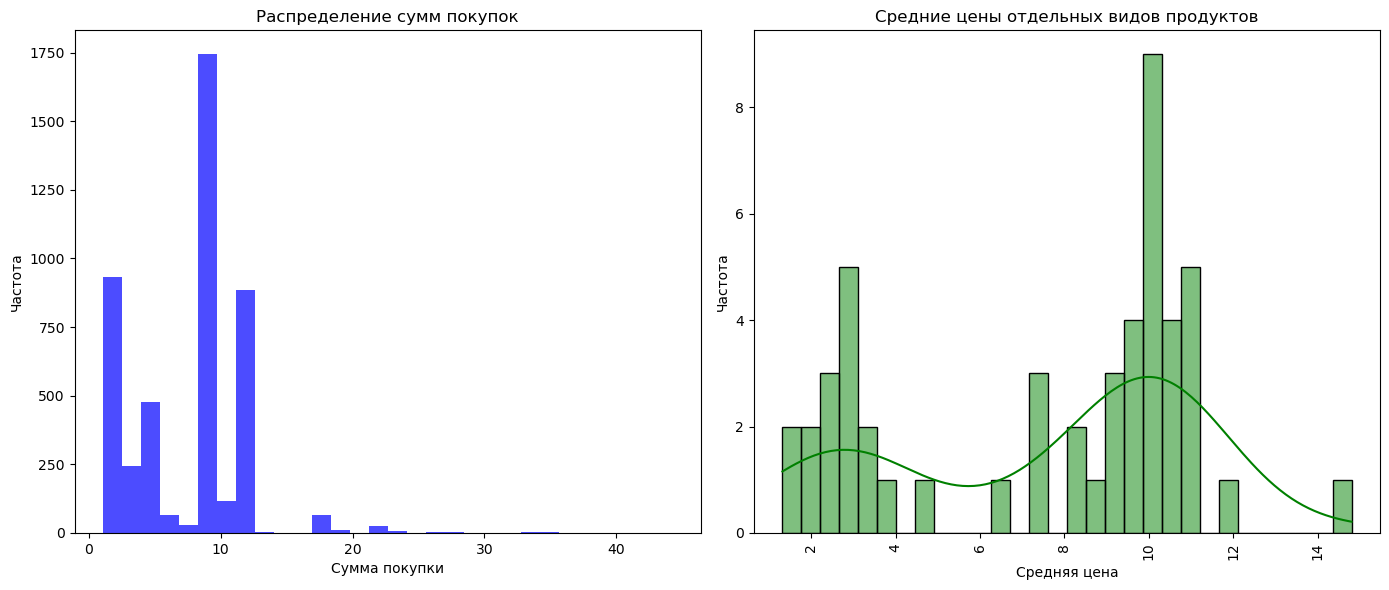

In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(orders_df['item_price_new'], bins=30, color='blue', alpha=0.7)
plt.title('Распределение сумм покупок')
plt.xlabel('Сумма покупки')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
average_prices = orders_df.groupby('item_name')['item_price_new'].mean()
sns.histplot(average_prices, bins=30, color='green', kde=True)
plt.title('Средние цены отдельных видов продуктов')
plt.xlabel('Средняя цена')
plt.ylabel('Частота')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### 15. Постройте график зависимости суммы покупок от дней.

In [ ]:
df = orders_df.copy()

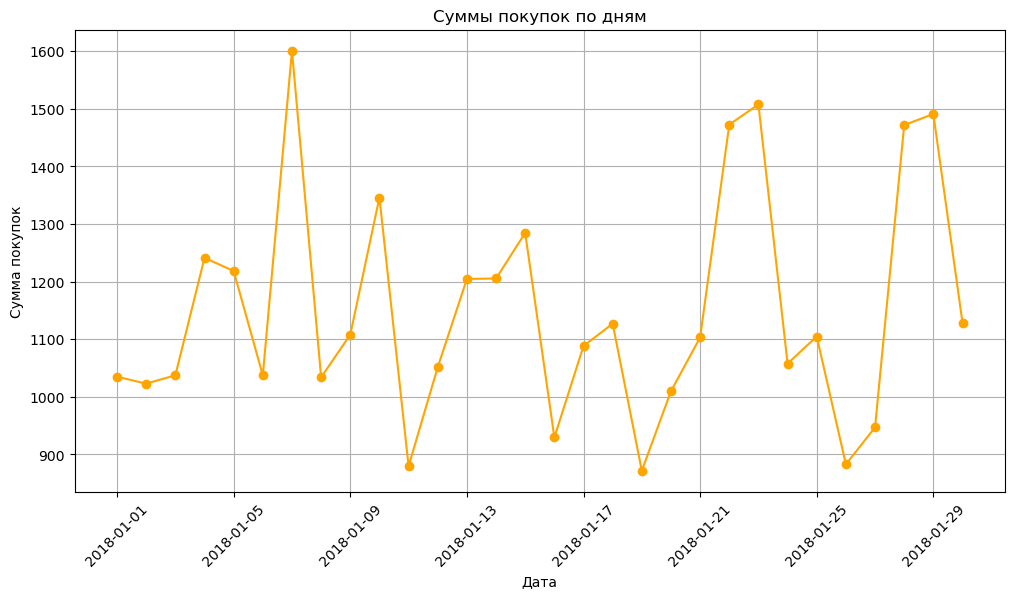

In [ ]:
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(12, 6))
plt.plot(df.groupby('date')['item_price_new'].sum(), marker='o', linestyle='-', color='orange')
plt.title('Суммы покупок по дням')
plt.xlabel('Дата')
plt.ylabel('Сумма покупок')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### 16. Постройте средних сумм покупок по дням недели (bar plot).

In [ ]:
import warnings
warnings.filterwarnings("ignore")

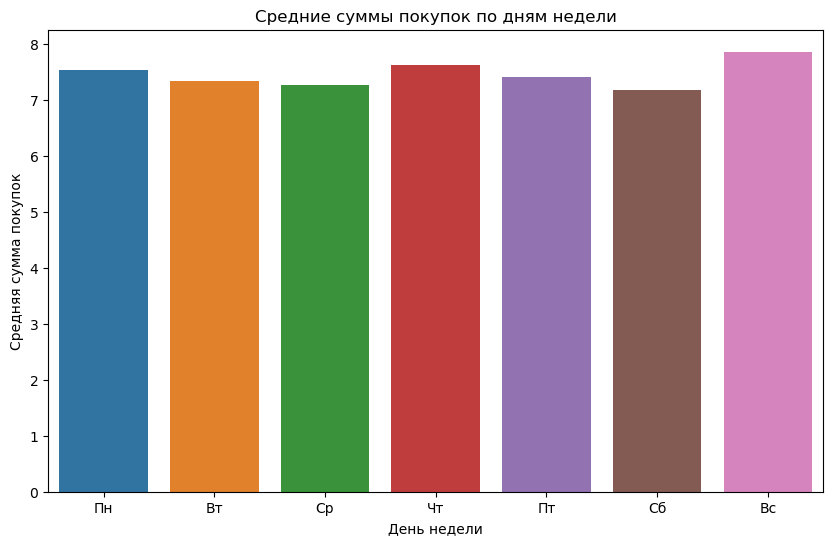

In [ ]:
import seaborn as sns

df['weekday'] = df['date'].dt.weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='item_price_new', data=df, ci=None)
plt.title('Средние суммы покупок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя сумма покупок')
plt.xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.show()

#### 17. Постройте график зависимости денег за товар от купленного количества (scatter plot).

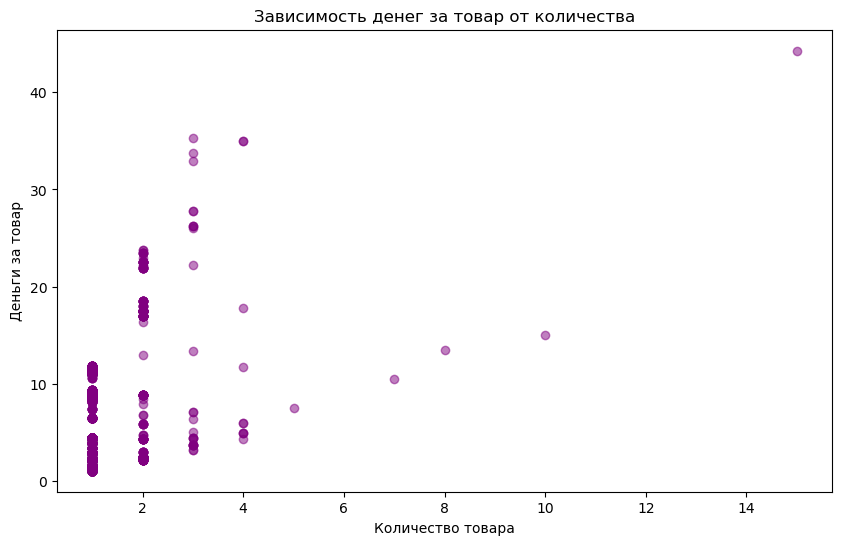

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['quantity'], df['item_price_new'], color='purple', alpha=0.5)
plt.title('Зависимость денег за товар от количества')
plt.xlabel('Количество товара')
plt.ylabel('Деньги за товар')
plt.show()

#### 18. Сохраните график в формате pdf (так он останется векторизованным).

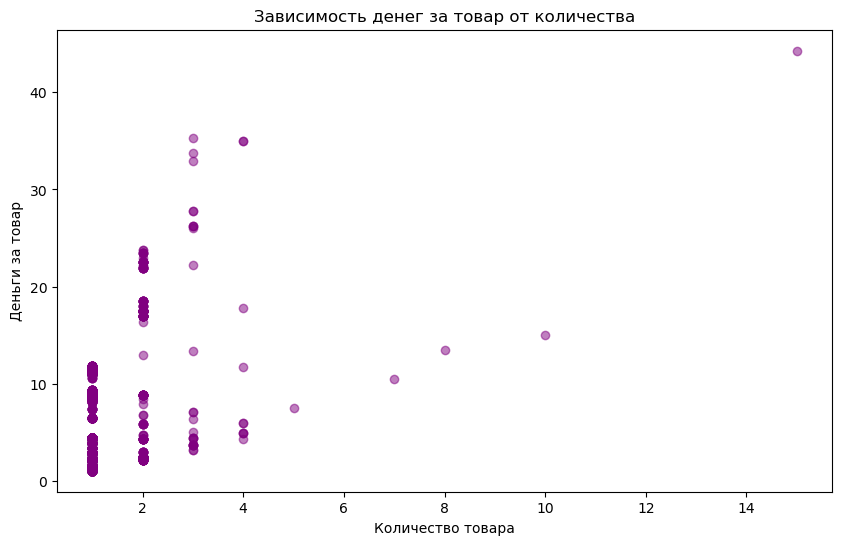

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['quantity'], df['item_price_new'], color='purple', alpha=0.5)
plt.title('Зависимость денег за товар от количества')
plt.xlabel('Количество товара')
plt.ylabel('Деньги за товар')
plt.savefig('scatter_plot.pdf', format='pdf')

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.